# 3 - hp refinement example using MPT-Calculator

The accuracy of the computed MPT coefficients depend on the discretisation used to discretise the transmission problem for ${\boldsymbol \theta}_i^{(0)}$ and ${\boldsymbol \theta}_i^{(1)}$, which in turn are used to compute the MPT coefficients. The accuracy of the solution depends on the order of the elements and the size and distribution of the tetrahedra in the mesh. To ensure that the solution is accurate, we refine the discretisation until convergence of the solution is achieved.

There are two alternative types of refinement $p$ refinement, which involves enrichment of the element order, and $h$ refinement, which involves using a finer mesh of tetrahedral elements (either locally or globally). Note that we only consider global enrichment of the element order.

In [2]:
# This bit code allows a python file to be changed and then for the updates to be available without restarting
# the jupyter kernal
%load_ext autoreload
%autoreload 2

from time import time
import numpy as np
from matplotlib import pyplot as plt
import os
# Please edit this line to provide the to the root directory of your copy of MPT-Calculator
Your_Path='/home/james/Desktop/Updated_MPT_Calculator/MPT-Calculator'
#Your_Path='/Users/cgledger/Coding/MPT-Calculator_v2/MPT-Calculator'

os.chdir(Your_Path)
os.getcwd()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'/home/james/Desktop/Updated_MPT_Calculator/MPT-Calculator'

In [3]:
from main import main

importing NGSolve-6.2.2204


## $p$ - Refinement

In this example, we wish to explore the effect of changing the polynomial order of the $\boldsymbol{H}(curl)$ discretisation. We expect that increasing the order $p$ from $p=0\rightarrow p=1\rightarrow p=2\rightarrow p=3$ will result in a more accurate simulation at the cost of an increased computational time.

An important consideration when doing $p$-refinement is to ensure that geometry of the sphere is sufficiently resolved. In $p$ refinement, we use curved elements (which are on by default, but don't provide exact geometry), and since we don't change the mesh as we increase the order, we need to make sure that the mesh around the sphere is sufficiently fine (we have this using not only curved elements (this is achieved by controlling maxh for the spacing around the sphere in the $\texttt{sphere.geo}$ file, here the file sets maxh=0.2 for the inner sphere). We will go in to geometry files in more detail in later tutorials. 

For control over the order we want to specify $p$ as an input argument
```python
main(order=p)
```
which can be done iteratively


Solving for order = 0
sphere.geo
generating mesh
 mesh contains 7592 elements
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
 solved theta0 problems    
 solving theta1 snapshots
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
 solving theta1
 solving theta1 9/13    
 solving theta1 11/13    
 solving theta1 10/13    
manually closed pool3    
 SVD complete                
0 : [0.00229969668711035]odel
1 : [0.0020681194908297646]
2 : [0.002037422946960409]
3 : [0.00202339010785542]
4 : [0.0020103858903167703]
5 : [0.0019969772032678557]
6 : [0.001983745570449881]
7 : [0.0019713047494946375]
8 : [0.001960110648147125]
9 : [0.0019504134578389074]
10 : [0.001942263117641625]
11 : [0.0019355624497359102]
12 : [0.0019301265396191654]
13 : [0.0019257348456919441]
14 : [0.0019221677077373258]
15 : [0.0019192244072297072]
16 : [0.0019167335037384664]
17 : [0.0019145512147348551]
18 : [0.00191256165821

importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
manually closed pooler system 39/40    
 reduced order systems solved          
 frequency sweep complete


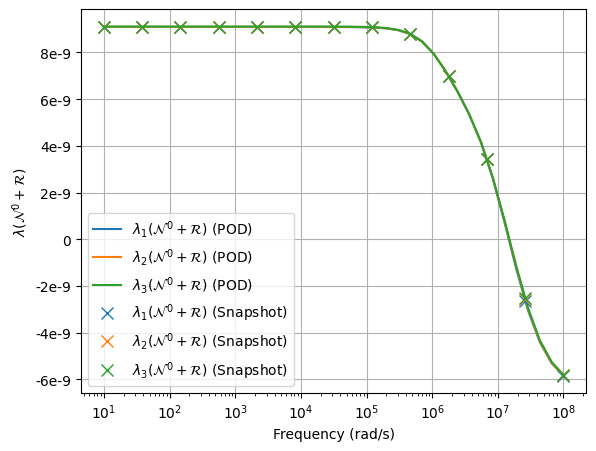

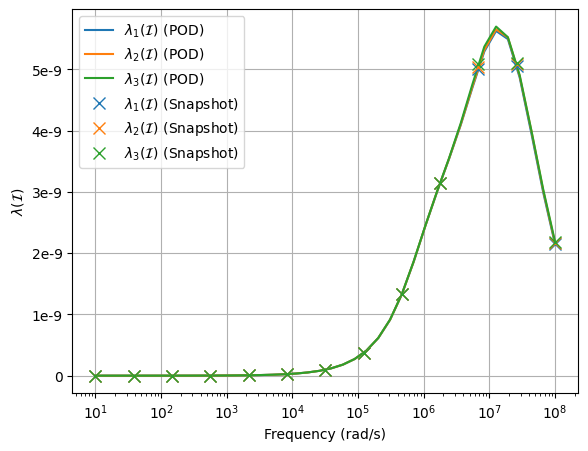

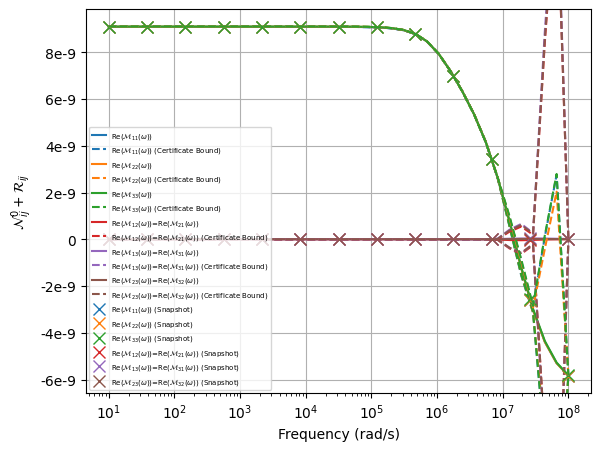

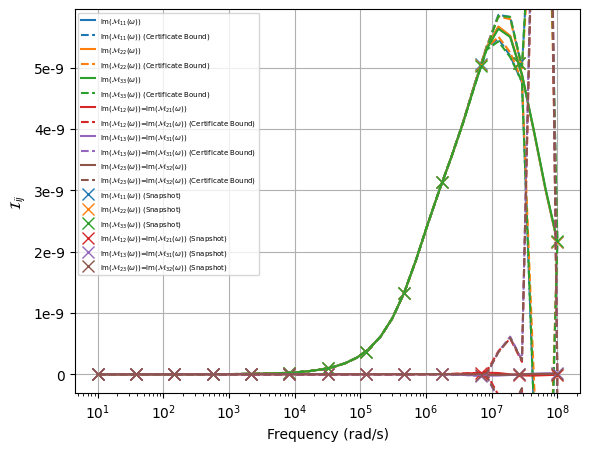

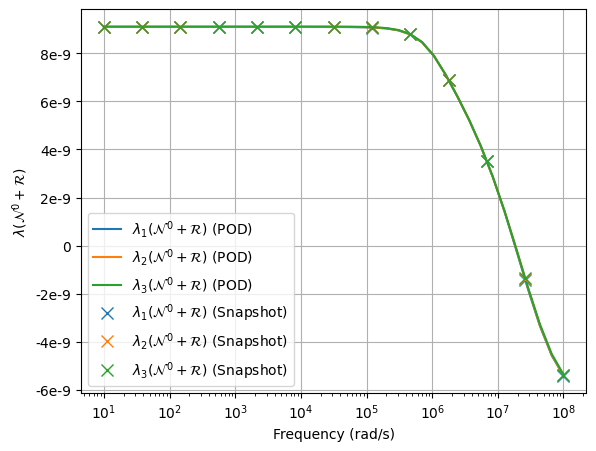

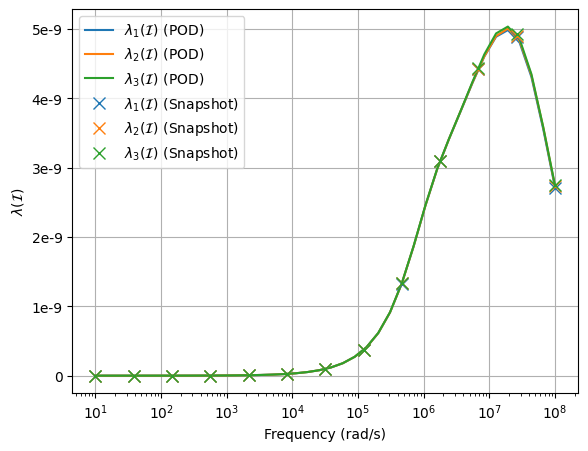

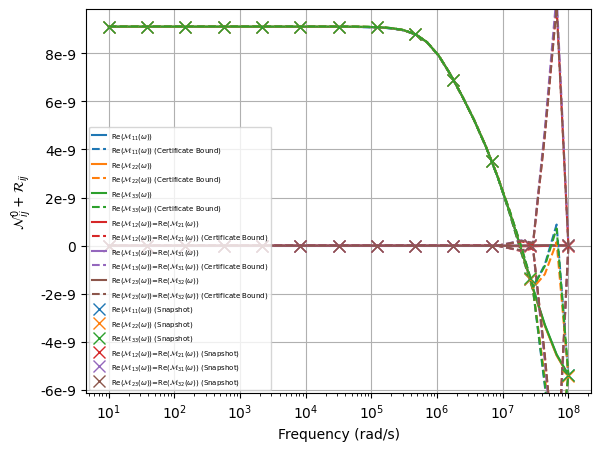

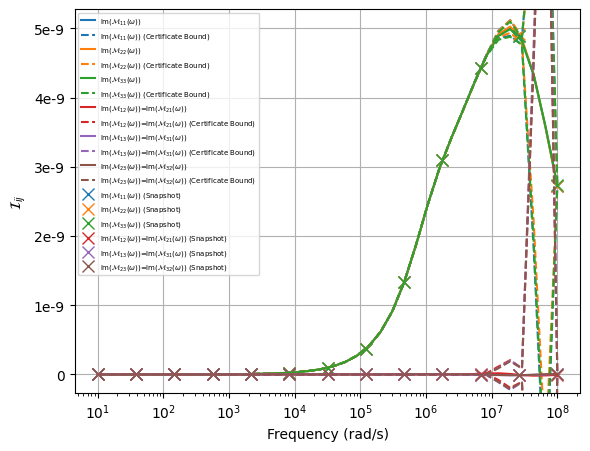

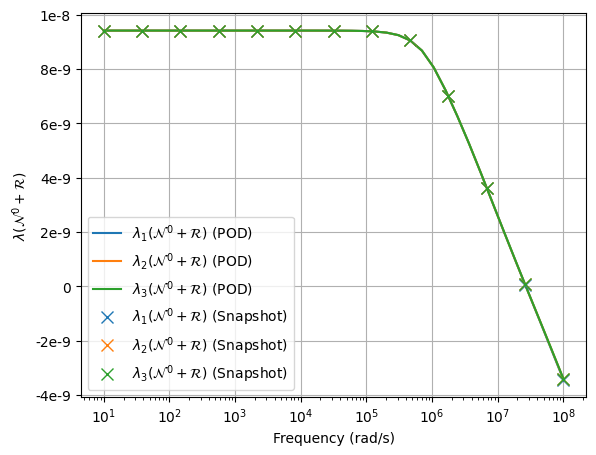

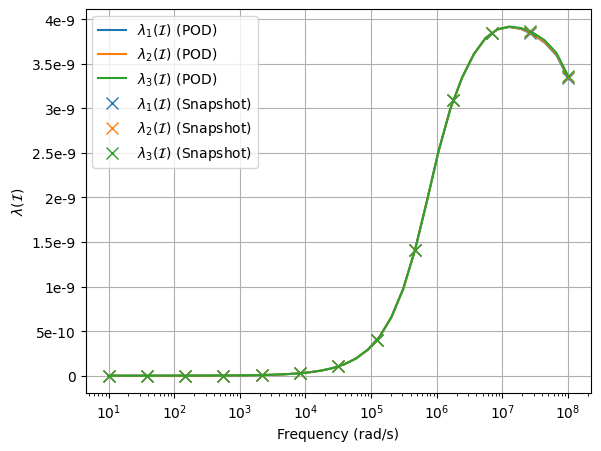

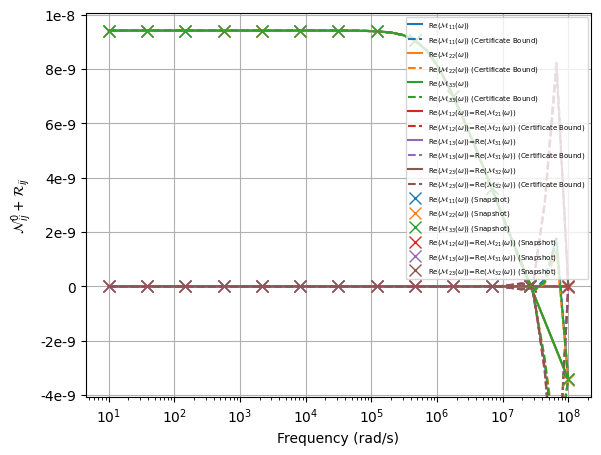

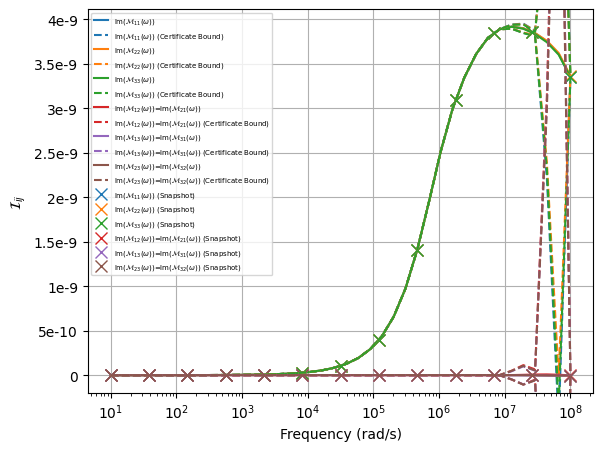

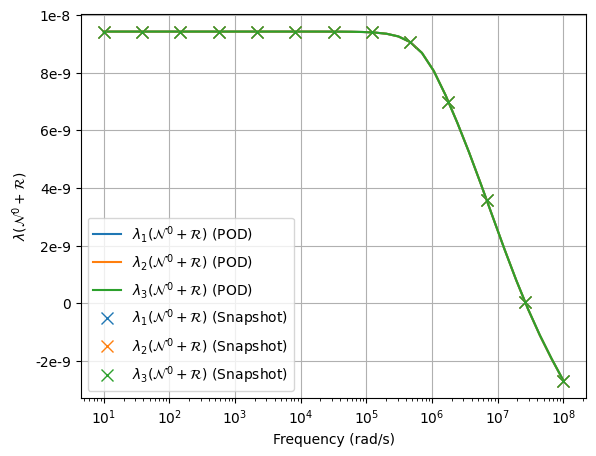

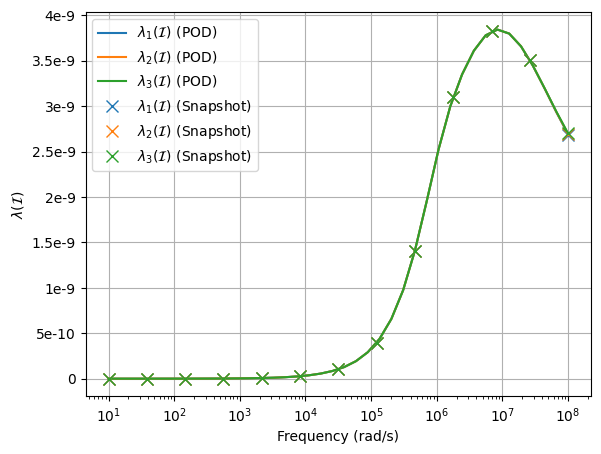

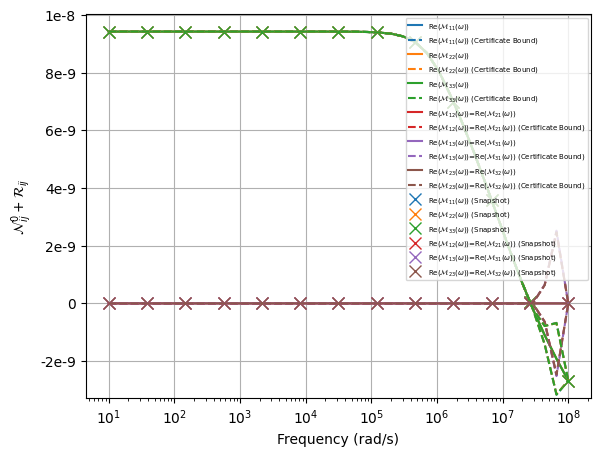

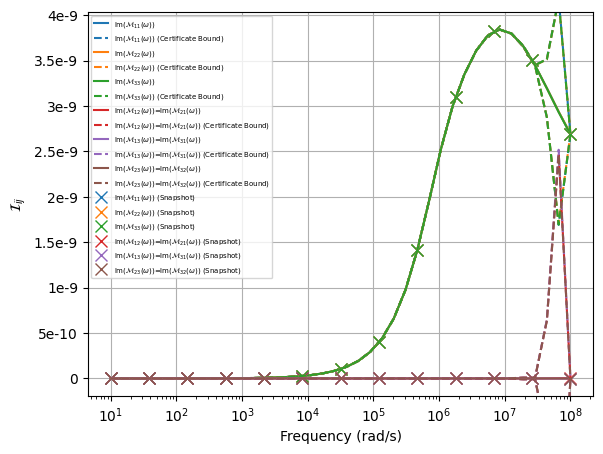

In [4]:
comparison_eig_p = np.zeros((40,4), dtype=complex)
comparison_ndofs_p = np.zeros(4)
start_time = time()
for p in [0,1,2,3]:
    print('Solving for order =',p)
    Return_Dict = main(use_POD=True, order=p)
    comparison_eig_p[:,p] = Return_Dict['EigenValues'][:,0]
    comparison_ndofs_p[p] = Return_Dict['NDOF'][1]
stop_time = time()

In [5]:
print(f'Total computation time (p refinement) = {(stop_time - start_time)/60} minutes')

Total computation time (p refinement) = 2.8860480070114134 minutes


Plotting the first eigenvalue for the different $p$, shows that the solutions are in agreement upto $\sim 10^7$ rad/s, after which the solutions begin to diverge.

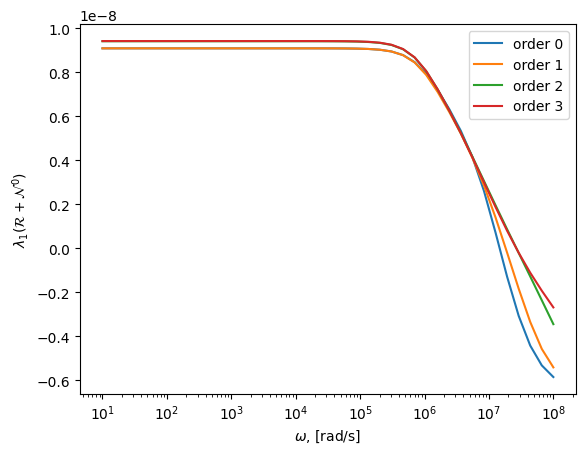

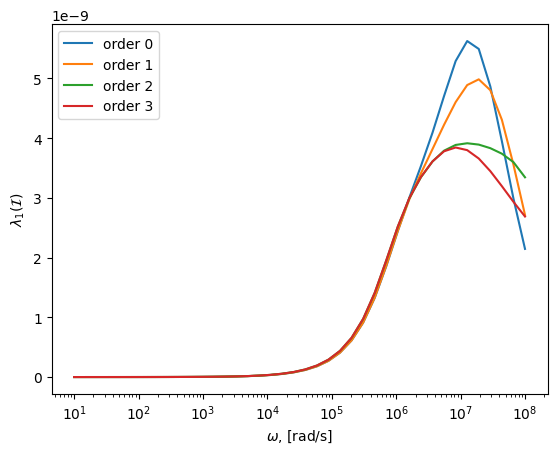

In [7]:
plt.figure()
for p in [0,1,2,3]:
    plt.semilogx(Return_Dict['FrequencyArray'], comparison_eig_p[:,p].real, label=f'order {p}')
plt.legend();
plt.xlabel('$\omega$, [rad/s]');
plt.ylabel('$\lambda_1(\mathcal{R} + \mathcal{N}^0)$');

plt.figure()
for p in [0,1,2,3]:
    plt.semilogx(Return_Dict['FrequencyArray'], comparison_eig_p[:,p].imag, label=f'order {p}')
plt.legend();
plt.xlabel('$\omega$, [rad/s]');
plt.ylabel('$\lambda_1(\mathcal{I})$');

We can see that increasing the order leads to a rapid convergence of the soluion. Already using order 3 give a solution that is converged upto $10^7$ rad/s and this can be improved for high frequencies by further increasing the order. The problem solved is a magnetic sphere, if instead $\mu_r=1$ was chosen then a more accurate solution can be achieved for the same discretisation. This is becuase the skin depth is less changing to capature in this case. Later tutorials will address how to change the materials and object geometry.

## $h$ - Refinement

Similarly to refining $p$, we can also increase the density of the mesh, to provide finer spatial resolution. In this example, we reduce the maximum element size in the mesh and observe that this provides a more accurate solution. Note that we now choose to keep the order of elements fixed to be the lowest order (0).

There are several ways to control the mesh spacing.

1. To set a maximum element size for a quasi-uniform mesh, we use the $\texttt{h}$ argument in $\texttt{main}$. For example, to set the max element size to 1 over the entire mesh we would use
```python
main(h=1)
```
which can also be done iteratively to generate a quasi-uniform mesh over the entire domain. Note that setting h=1 controls the maximum size in the mesh (not the size of all elements).

2. Another option is use the Netgen mesh sizing tags, $\texttt{'verycoarse'}$, $\texttt{'coarse'}$, $\texttt{'moderate'}$, $\texttt{'fine'}$, and $\texttt{'veryfine'}$ to specify a object size dependent discretisation.

e.g.
```python
main(h='coarse')
```

The mesh resulting from using $\texttt{coarse}$ is non-uniform.

3. The third option, which we use in the example below, is to change the maxh for the spacing in the inner sphere. We know that for this example controlling the spacing in the sphere is more important than say in the far field. So we loop through a sequence of .geo files each containing a different maxh value. 


Solving for geofile=spherehref0.geo
spherehref0.geo
generating mesh
 mesh contains 2547 elements
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
 solved theta0 problems    
 solving theta1 snapshots
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
 solving theta1
 solving theta1 9/13    
 solving theta1 11/13    
manually closed pool3    
 SVD complete                
importing NGSolve-6.2.2204del
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
manually closed pooler system 38/40    
 reduced order systems solved          
 frequency sweep complete
Solving for geofile=spherehref1.geo
spherehref1.geo
generating mesh
 mesh contains 3596 elements
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
 solved theta0 problems    
 solving theta1 snapshots
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importing NGSolve-6.2.2204
importi

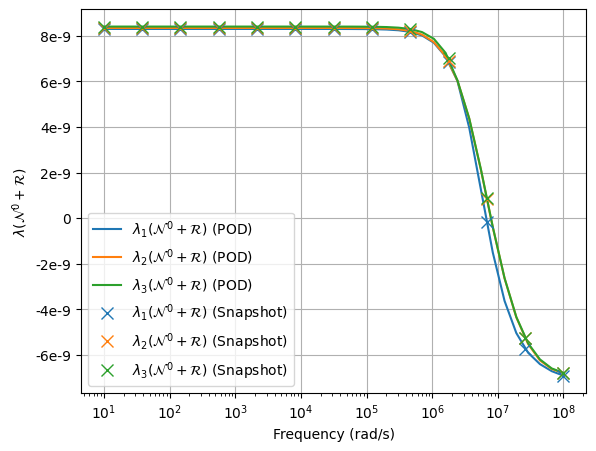

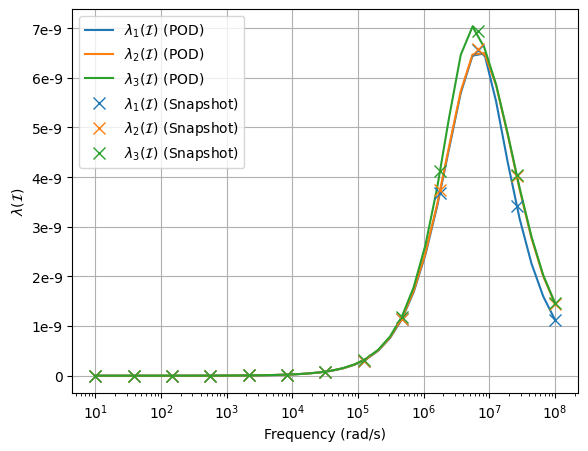

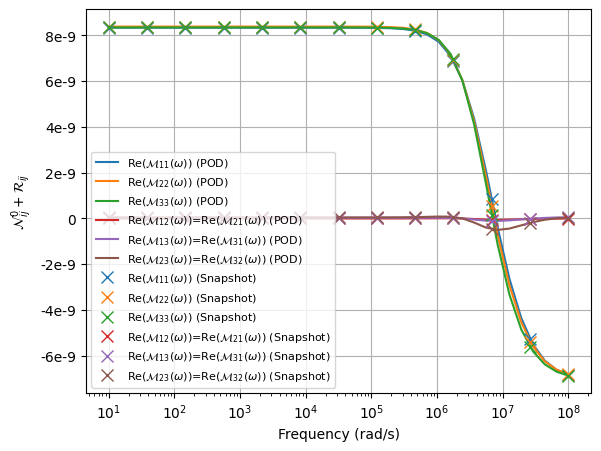

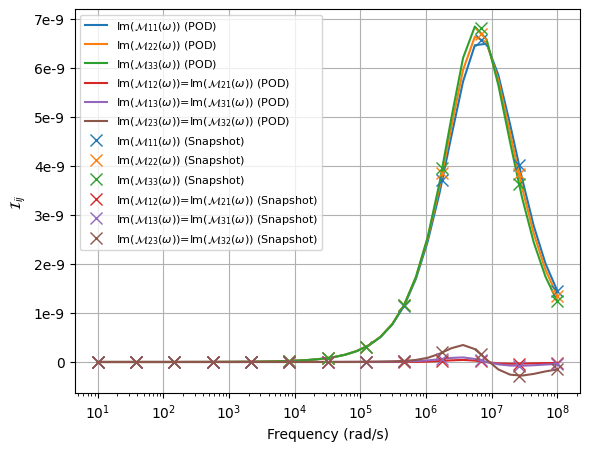

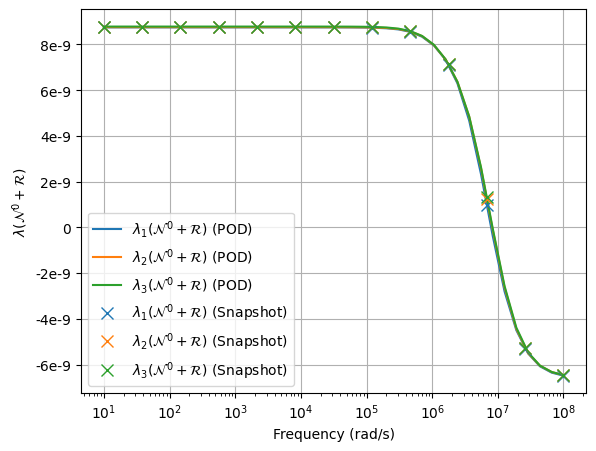

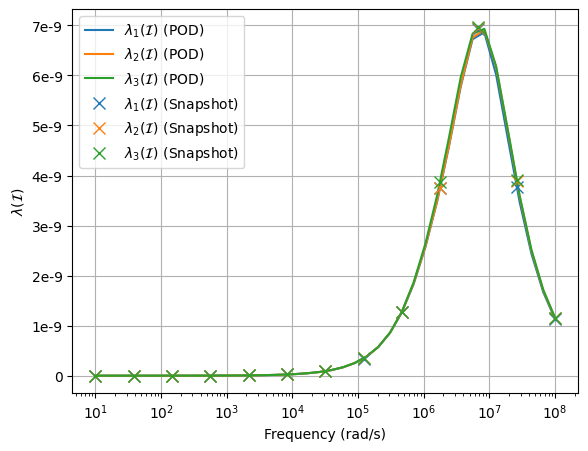

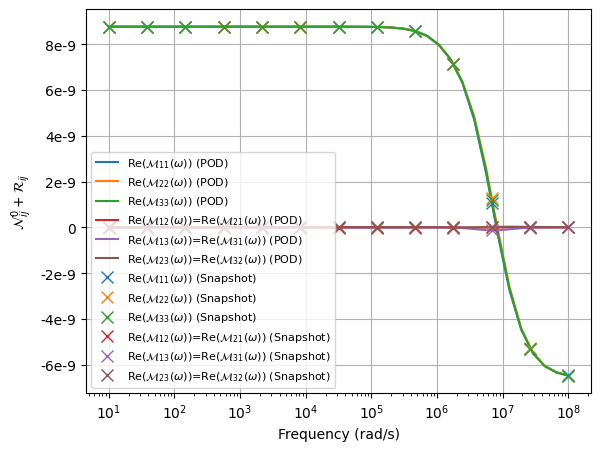

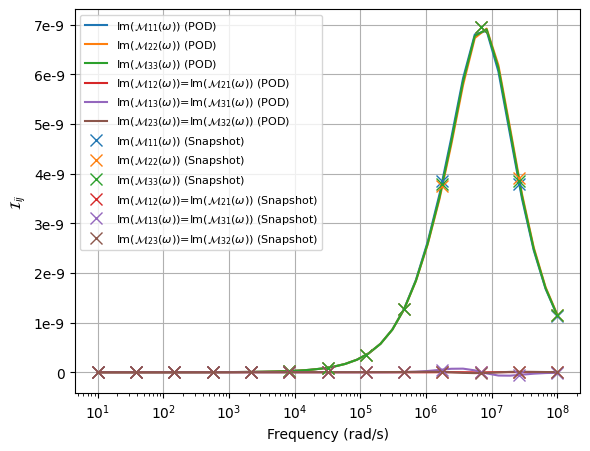

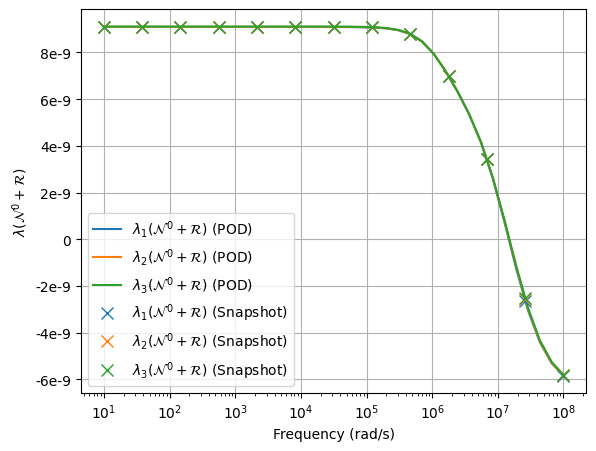

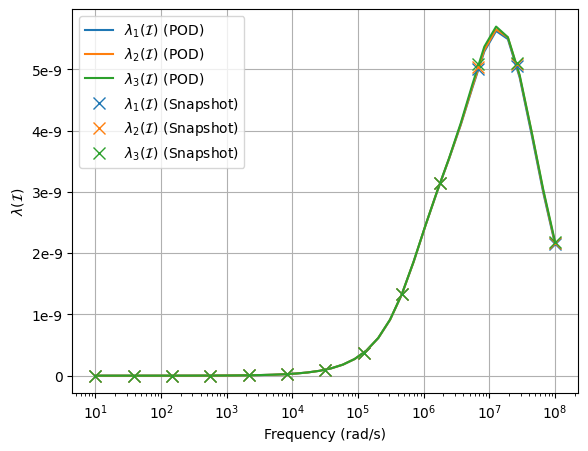

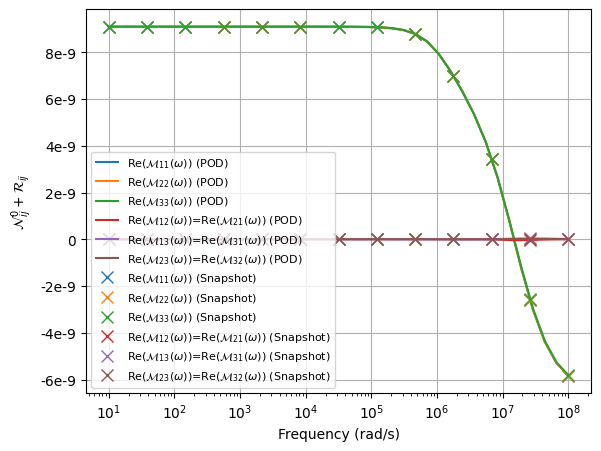

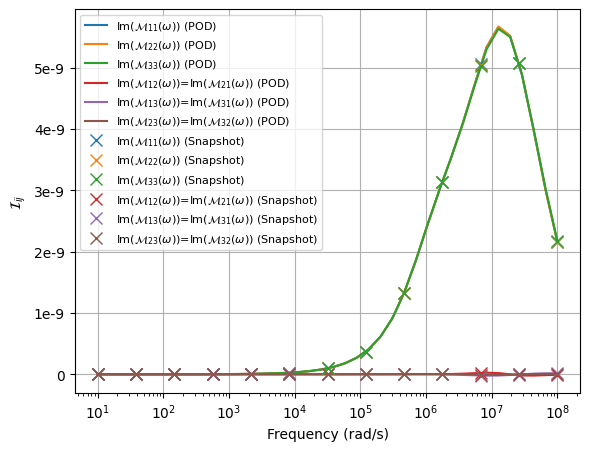

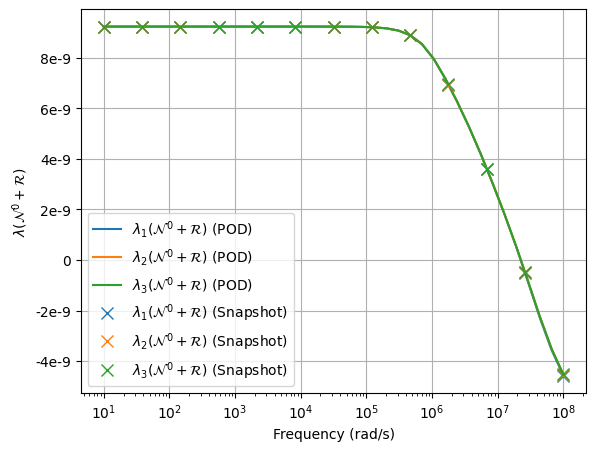

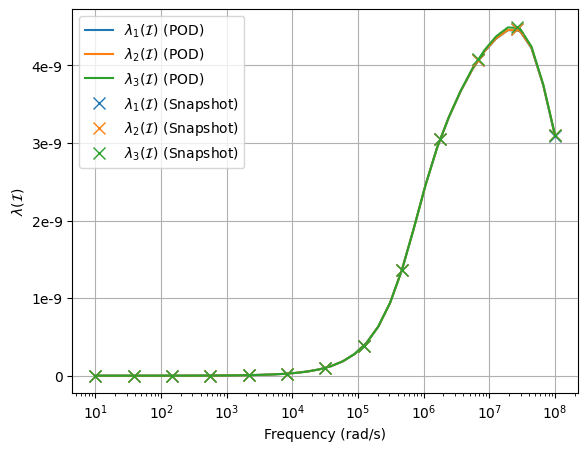

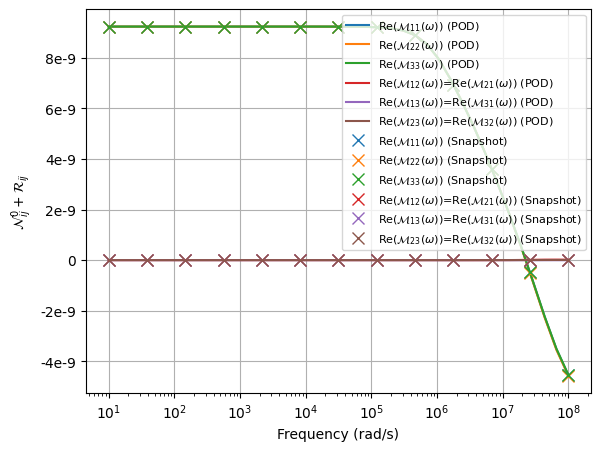

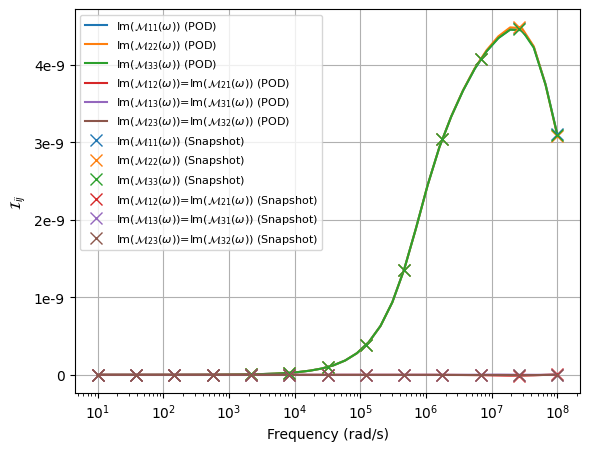

In [8]:
comparison_eig_h = np.zeros((40,4), dtype=complex)
comparison_ndofs_h = np.zeros(4)
# use this option if you don't have a machine with 32 Gb Ram or more and/or want a quicker run time.
geo_array = ['spherehref0.geo','spherehref1.geo', 'spherehref2.geo', 'spherehref3.geo']#
# use this option if you have a machine with 64 Gb Ram or more and are happy to wait a long time!
#geo_array = ['spherehref1.geo', 'spherehref2.geo', 'spherehref3.geo','spherehref4.geo']

start_time = time()
for n, h in enumerate(geo_array):
    print(f'Solving for geofile={h}')
    Return_Dict = main(use_POD=True, order=0, geometry=h)
    comparison_eig_h[:,n] = Return_Dict['EigenValues'][:,0]
    comparison_ndofs_h[n] = Return_Dict['NDOF'][1]
stop_time = time()



In [9]:
print(f'Total computation time (h refinement) = {(stop_time - start_time)/60} minutes')

Total computation time (h refinement) = 3.6594512820243836 minutes


Performing $h$--refinement is generally much more expensive than $p$--refinement. After discretising the finite element problem a large complex linear system of equation needs to be solved. The preconditioner employed solves the lowest order block in this system directly and, as we are only using lowest order elements in $h$-refinement, this means that the complete system is solved directly and the iterative solver converges in a single iteration. However, direct solves are expensive and there is a large memory growth as the mesh is refined. Not only is there a large growth in memory and also increased run times. As before, plotting the first eigenvalue shows the effect of refining the mesh. 

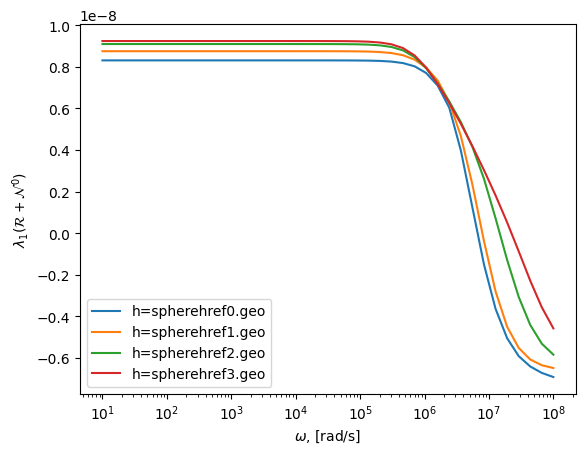

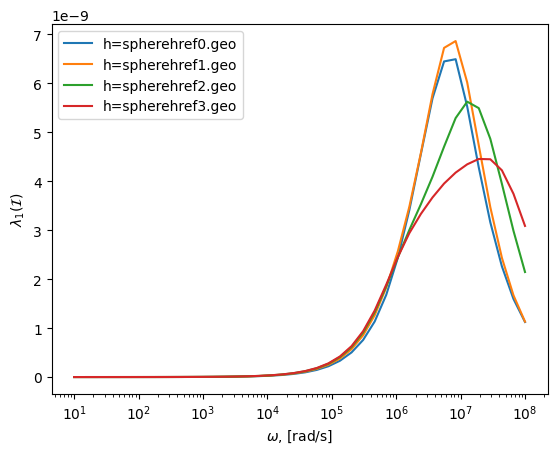

In [9]:
plt.figure()
for h in [0,1,2,3]:
    plt.semilogx(Return_Dict['FrequencyArray'], comparison_eig_h[:,h].real, label=f'h={geo_array[h]}')
plt.legend();
plt.xlabel('$\omega$, [rad/s]');
plt.ylabel('$\lambda_1(\mathcal{R} + \mathcal{N}^0)$');

plt.figure()
for h in [0,1,2,3]:
    plt.semilogx(Return_Dict['FrequencyArray'], comparison_eig_h[:,h].imag, label=f'h={geo_array[h]}')
plt.legend();
plt.xlabel('$\omega$, [rad/s]');
plt.ylabel('$\lambda_1(\mathcal{I})$');


We see that the resulting curves are also converging, but only up to frequencies around $10^6$ S/m. We will see shortly that the relative error is much larger than it is for $p$-refinement. Indeed, to capture an accurate solution for this sphere would require a very dense mesh.

Given this, and comparing the computation times for $p$ and $h$ refinements, we see that in this case $p$ refinement is significantly more effective.

To further understand the difference we consider the relative error in the approximated eigenvalues for $h$ and $p$ refinement. We can compute the error in this case as we have an exact solution for a conducting permeable sphere.

<b>Note: In general, we do not have an exact solution to the rank 2 MPT for all objects, so this comparison with an exact solution only works with a sphere.</b>

In MPT-Calculator, we have a function to calculate the exact solution for a sphere.

In [10]:
from Functions.Helper_Functions.exact_sphere import exact_sphere

In [11]:
frequency_index = 10
alpha =1e-3
sigma = 1e6
mur = 10
epsilon = 0
omega = Return_Dict['FrequencyArray'][frequency_index]

exact_solution = exact_sphere(alpha, epsilon, mur, sigma, omega)

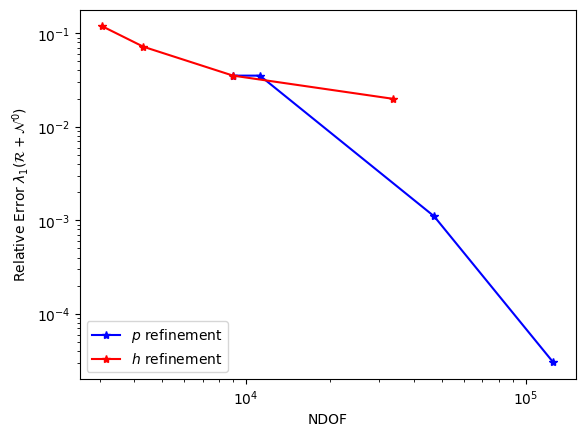

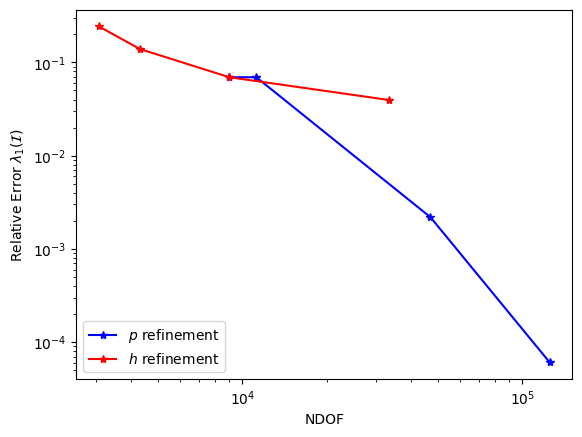

In [13]:
relative_error_real_p = np.zeros(4)
relative_error_imag_p = np.zeros(4)
relative_error_real_h = np.zeros(4)
relative_error_imag_h = np.zeros(4)

for p in [0,1,2,3]:
    relative_error_real_p[p] = np.abs((comparison_eig_p[frequency_index,p].real - exact_solution.real)) / np.abs(exact_solution.real)
    relative_error_imag_p[p] = np.abs((comparison_eig_p[frequency_index,p].imag - exact_solution.imag)) / np.abs(exact_solution.imag)

for h in [0,1,2,3]:
    relative_error_real_h[h] = np.abs((comparison_eig_h[frequency_index,h].real - exact_solution.real)) / np.abs(exact_solution.real)
    relative_error_imag_h[h] = np.abs((comparison_eig_h[frequency_index,h].imag - exact_solution.imag)) / np.abs(exact_solution.imag)

    
plt.figure()    
plt.plot(comparison_ndofs_p, relative_error_real_p, 'b*-', label='$p$ refinement')
plt.plot(comparison_ndofs_h, relative_error_real_h, 'r*-', label='$h$ refinement')

plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.legend(loc='lower left')
plt.ylabel('Relative Error $\lambda_1(\mathcal{R} + \mathcal{N}^0)$')
plt.xlabel('NDOF')

plt.figure()    
plt.plot(comparison_ndofs_p, relative_error_imag_p, 'b*-', label='$p$ refinement')
plt.plot(comparison_ndofs_h, relative_error_imag_h, 'r*-', label='$h$ refinement')

plt.gca().set_xscale('log')
plt.gca().set_yscale('log')
plt.legend(loc='lower left')
plt.ylabel('Relative Error $\lambda_1(\mathcal{I})$')
plt.xlabel('NDOF');

We observe that the $p$ refinement leads to an exponential convergence of the MPT coefficients to the exact solution, while $h$ refinement leads to only an algebraic rate of convergence. Furthermore, for very coarse meshes, $h$-refinement may show a pre-asymptotic where the convergence may at first quick before slowing down to a constant rate. On the other hand, provided that the geometry is sufficiently well resolved, then the rate of converges improves as $p$ is increased (in practice this will always be limited by th geometry resolution). This means that for a given fixed number of degrees of freedom (NDOF), using $p$ refinement gives a more accurate solution compared to the corresponding solution with $h$ refinement.

In general, given the improved accuracy with $p$ refinement, we recommend using this over $h$ refinement. For objects with sharp edges and/or strong material discontinuities or high $\mu_r$, it may also beneficial to use local $h$ refinement (or boundary layer elements in the case of high $\mu_r$) to supplement using $p$ refinement. Further details of this are provided in subsequent tutorials.